# Analisar dados com o Apache Spark

## Como o Spark funciona

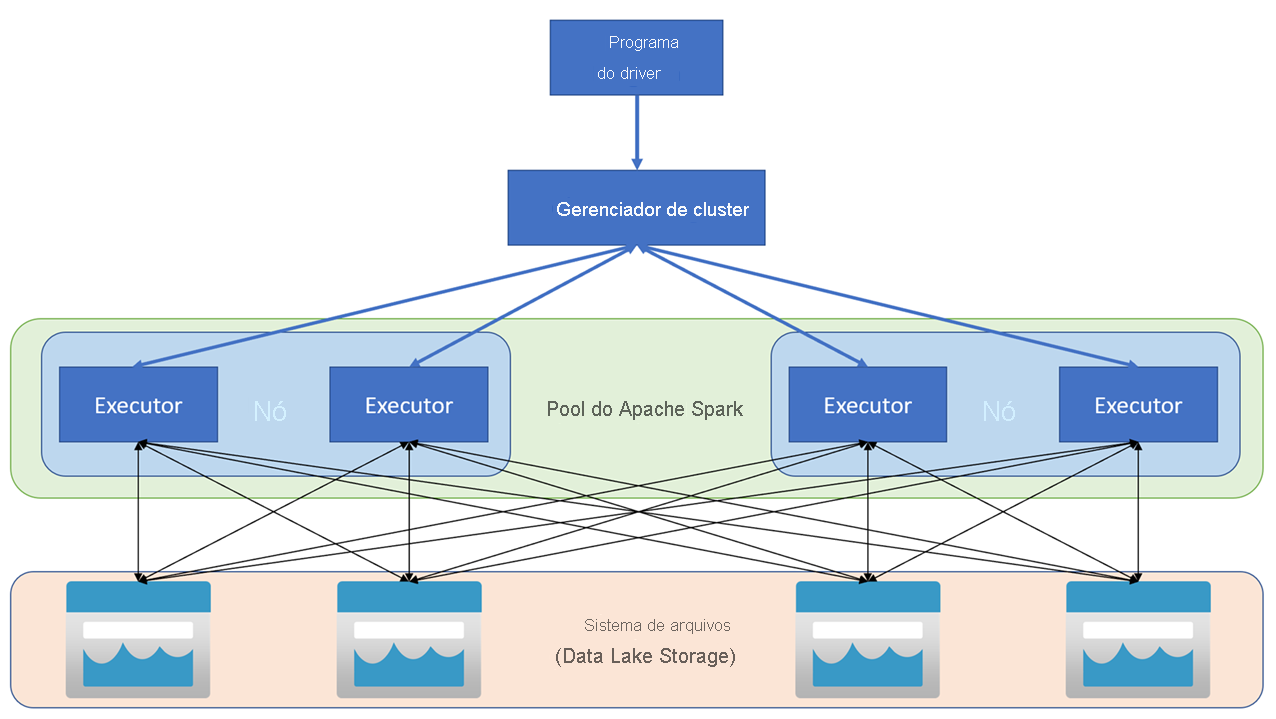

## Pools do Spark no Azure Synapse Analytics

No Azure Synapse Analytics, um cluster é implementado como um pool do Spark, que fornece um runtime para operações do Spark. Você pode criar um ou mais pools do Spark em um workspace do Azure Synapse Analytics usando o portal do Azure ou no Azure Synapse Studio. Ao definir um pool do Spark, você pode especificar opções de configuração para o pool, incluindo:

Um nome para o pool do Spark.

O tamanho da VM (máquina virtual) usada para os nós no pool, incluindo a opção de usar nós habilitados para GPU acelerada por hardware.

O número de nós no pool e se o tamanho do pool é fixo ou os nós individuais podem ser colocados online dinamicamente para dimensionar automaticamente o cluster; nesse caso, você pode especificar o número mínimo e máximo de nós ativos.

A versão do Spark Runtime a ser usada no pool; que dita as versões de componentes individuais, como Python, Java e outros que são instalados.

## Usar o Spark no Azure Synapse Analytics

Você pode executar muitos tipos diferentes de aplicativos no Spark, incluindo código em scripts Python ou Scala, código Java compilado como JAR (Arquivo Java) e outros. O Spark é normalmente usado em dois tipos de carga de trabalho:

Trabalhos de processamento em lote ou fluxo para ingerir, limpar e transformar dados (geralmente em execução como parte de um pipeline automatizado).

Sessões de análise interativas para explorar, analisar e visualizar dados.

## Executando código Spark em notebooks

O Azure Synapse Studio inclui uma interface de notebook integrada para trabalhar com o Spark. Os notebooks fornecem uma forma intuitiva de combinar código com anotações Markdown, normalmente usados por cientistas e analistas de dados.

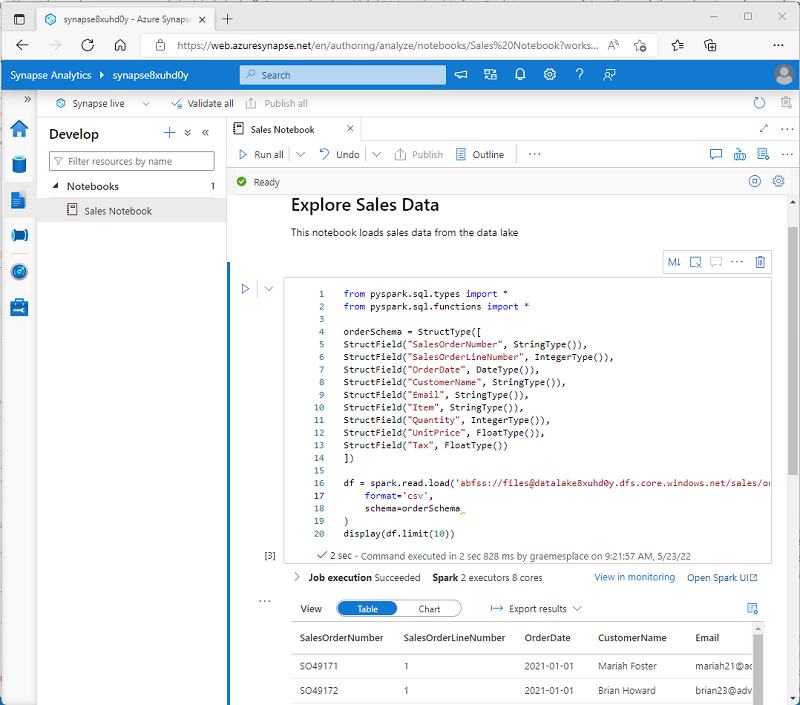

As células de código nos notebooks têm alguns recursos que podem ajudar você a ser mais produtivo, incluindo:

Realce de sintaxe e suporte a erros.

Preenchimento automático de código.

Visualização de dados interativas.

Exportação de resultados.

## Carregando dados em um dataframe

arquivo de texto delimitado por vírgulas chamado products.csv na conta de armazenamento primária de um workspace do Azure Synapse Analytics:

In [ ]:
ProductID,ProductName,Category,ListPrice
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.9900
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.9900
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.9900
...

Em um notebook Spark, você pode usar o seguinte código PySpark para carregar os dados em um dataframe e exibir as primeiras dez linhas:

In [ ]:
%%pyspark
df = spark.read.load('abfss://container@store.dfs.core.windows.net/products.csv',
    format='csv',
    header=True
)
display(df.limit(10))

A linha %%pyspark no início é chamada magic e informa ao Spark que a linguagem usada nessa célula é PySpark.

Por exemplo, este é o código Scala equivalente do exemplo de dados de produtos:

In [ ]:
%%spark
val df = spark.read.format("csv").option("header", "true").load("abfss://container@store.dfs.core.windows.net/products.csv")
display(df.limit(10))

## Especificando um esquema de dataframe

O seguinte exemplo do PySpark mostra como especificar um esquema para o dataframe a ser carregado de um arquivo chamado product-data.csv neste formato:

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

productSchema = StructType([
    StructField("ProductID", IntegerType()),
    StructField("ProductName", StringType()),
    StructField("Category", StringType()),
    StructField("ListPrice", FloatType())
    ])

df = spark.read.load('abfss://container@store.dfs.core.windows.net/product-data.csv',
    format='csv',
    schema=productSchema,
    header=False)
display(df.limit(10))

## Filtrando e agrupando dataframes

Você pode usar os métodos da classe Dataframe para filtrar, classificar, agrupar e manipular os dados contidos nela. Por exemplo, o seguinte exemplo de código usa o método select para recuperar as colunas ProductName e ListPrice do dataframe df que contém os dados do produto no exemplo anterior:

In [ ]:
pricelist_df = df.select("ProductID", "ListPrice")

A API de Dataframe faz parte de uma biblioteca do Spark chamada Spark SQL, a qual permite que analistas de dados usem expressões SQL para consultar e manipular dados.

## Visualizar os dados com o Spark

você pode usar uma das muitas bibliotecas gráficas do Python para criar e exibir visualizações de dados no notebook.

Quando você exibe um dataframe ou executa uma consulta SQL em um notebook Spark no Azure Synapse Analytics, os resultados são exibidos na célula de código.

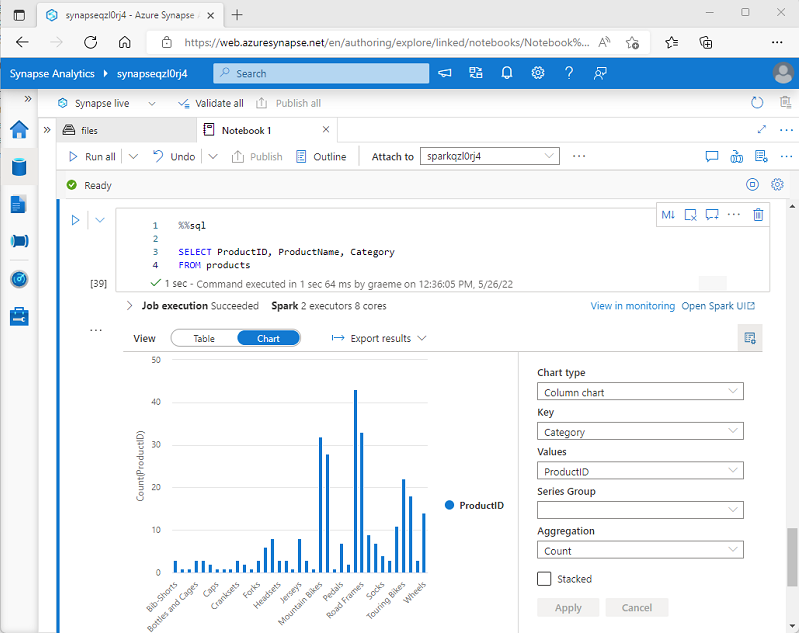

Há muitos pacotes gráficos que você pode usar para criar visualizações de dados no código. Em particular, o Python dá suporte a uma grande seleção de pacotes; a maioria deles foi criada na biblioteca Base Matplotlib.

Por exemplo, você pode usar o código PySpark a seguir para agregar dados dos dados de produtos hipotéticos explorados anteriormente neste módulo e usar Matplotlib para criar um gráfico com base nos dados agregados.

In [ ]:
from matplotlib import pyplot as plt

# Get the data as a Pandas dataframe
data = spark.sql("SELECT Category, COUNT(ProductID) AS ProductCount \
                  FROM products \
                  GROUP BY Category \
                  ORDER BY Category").toPandas()

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(12,8))

# Create a bar plot of product counts by category
plt.bar(x=data['Category'], height=data['ProductCount'], color='orange')

# Customize the chart
plt.title('Product Counts by Category')
plt.xlabel('Category')
plt.ylabel('Products')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=70)

# Show the plot area
plt.show()

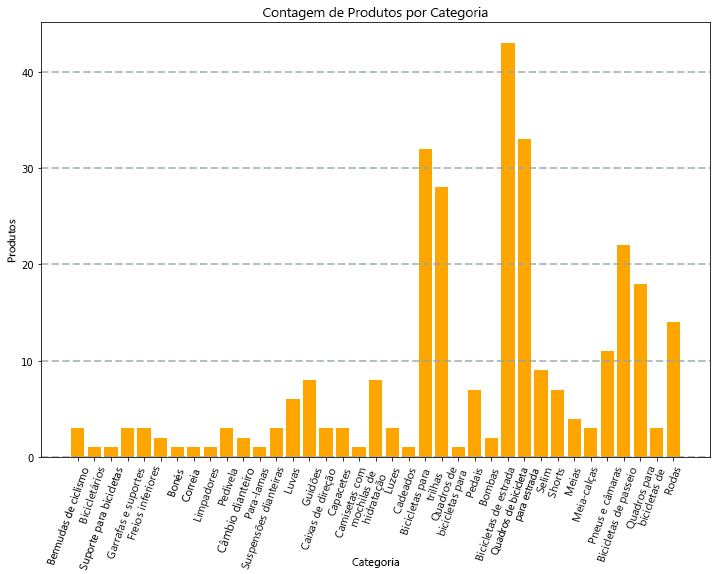

Você pode usar a biblioteca Matplotlib para criar muitos tipos de gráfico; ou, se preferir, você pode usar outras bibliotecas, como o Seaborn , para criar gráficos altamente personalizados.

# (Lab Prático)Analisar dados em um data lake com Spark

In [ ]:
 rm -r dp203 -f
 git clone  https://github.com/MicrosoftLearning/Dp-203-azure-data-engineer dp203

In [ ]:
 cd dp203/Allfiles/labs/05
 ./setup.ps1

## Use o Spark para explorar dados

Selecione qualquer um dos arquivos na pasta de pedidos e, na lista "Novo notebook" na barra de ferramentas, selecione "Carregar para DataFrame". Um dataframe é uma estrutura no Spark que representa um conjunto de dados tabular.

Quando o código terminar de ser executado, revise a saída abaixo da célula no notebook

(Print da minha tela com resultado):

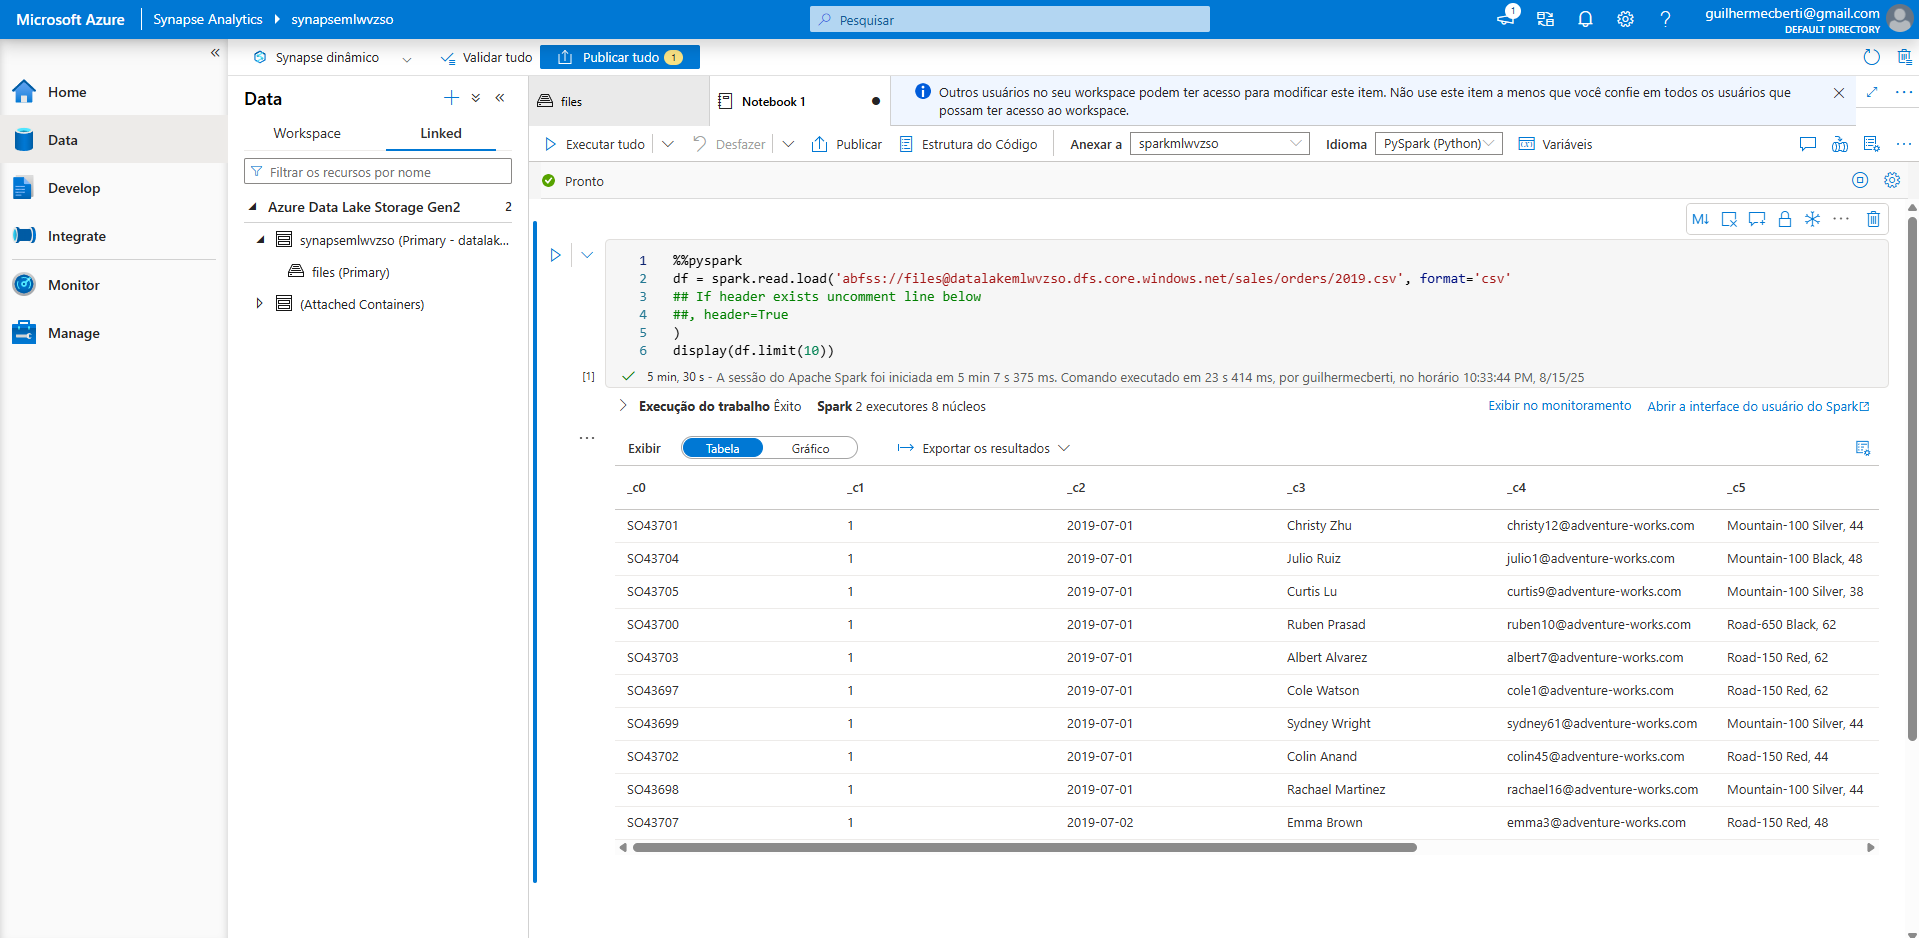

Modifique o código para que a função spark.read.load leia dados de todos os arquivos CSV na pasta e a função de exibição mostre as primeiras 100 linhas.

In [ ]:
 %%pyspark
 df = spark.read.load('abfss://files@datalakexxxxxxx.dfs.core.windows.net/sales/orders/*.csv', format='csv'
 )
 display(df.limit(100))

Modify the code as follows (replacing datalakexxxxxxx), to define an explicit schema for the dataframe that includes the column names and data types. Rerun the code in the cell.

In [ ]:
 %%pyspark
 from pyspark.sql.types import *
 from pyspark.sql.functions import *

 orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
     ])

 df = spark.read.load('abfss://files@datalakexxxxxxx.dfs.core.windows.net/sales/orders/*.csv', format='csv', schema=orderSchema)
 display(df.limit(100))

Abaixo dos resultados, use o botão + Código para adicionar uma nova célula de código ao notebook. Em seguida, na nova célula, adicione o seguinte código para exibir o esquema do dataframe:

In [ ]:
 df.printSchema()

(Print da minha tela com resultado):

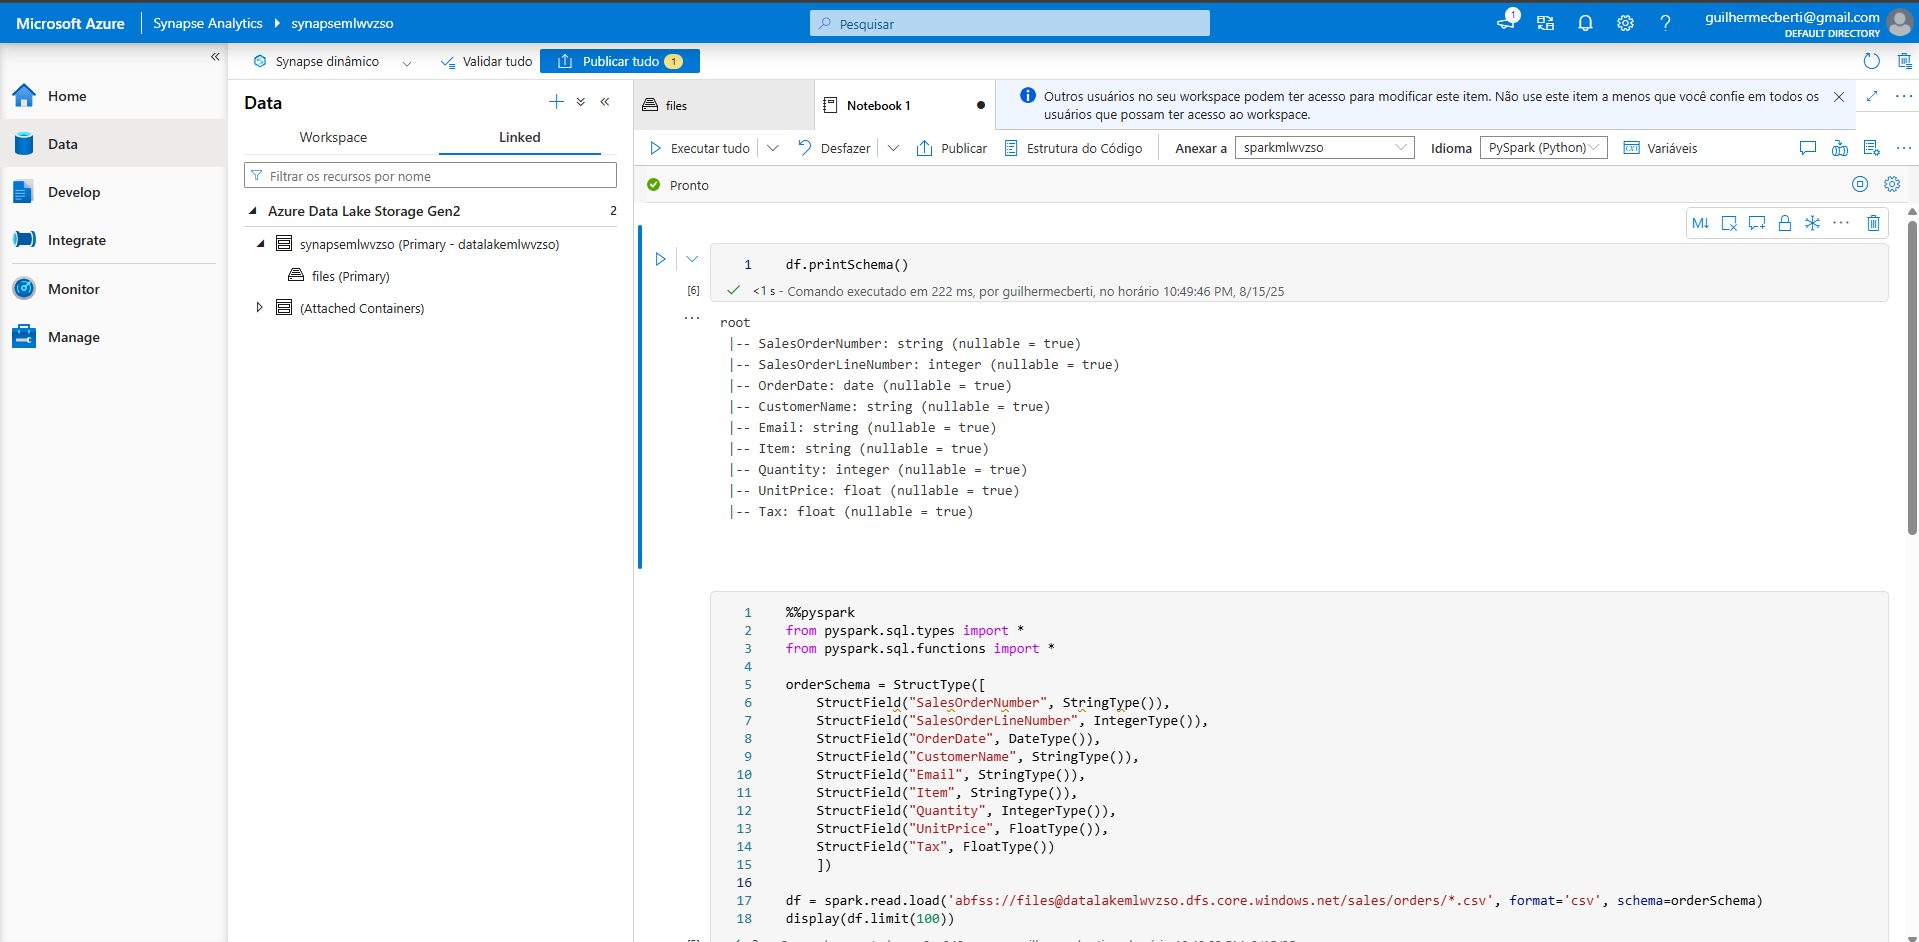

## Analisar dados em um dataframe

Adicione uma nova célula de código ao notebook e insira o seguinte código nela:

In [ ]:
 customers = df['CustomerName', 'Email']
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())

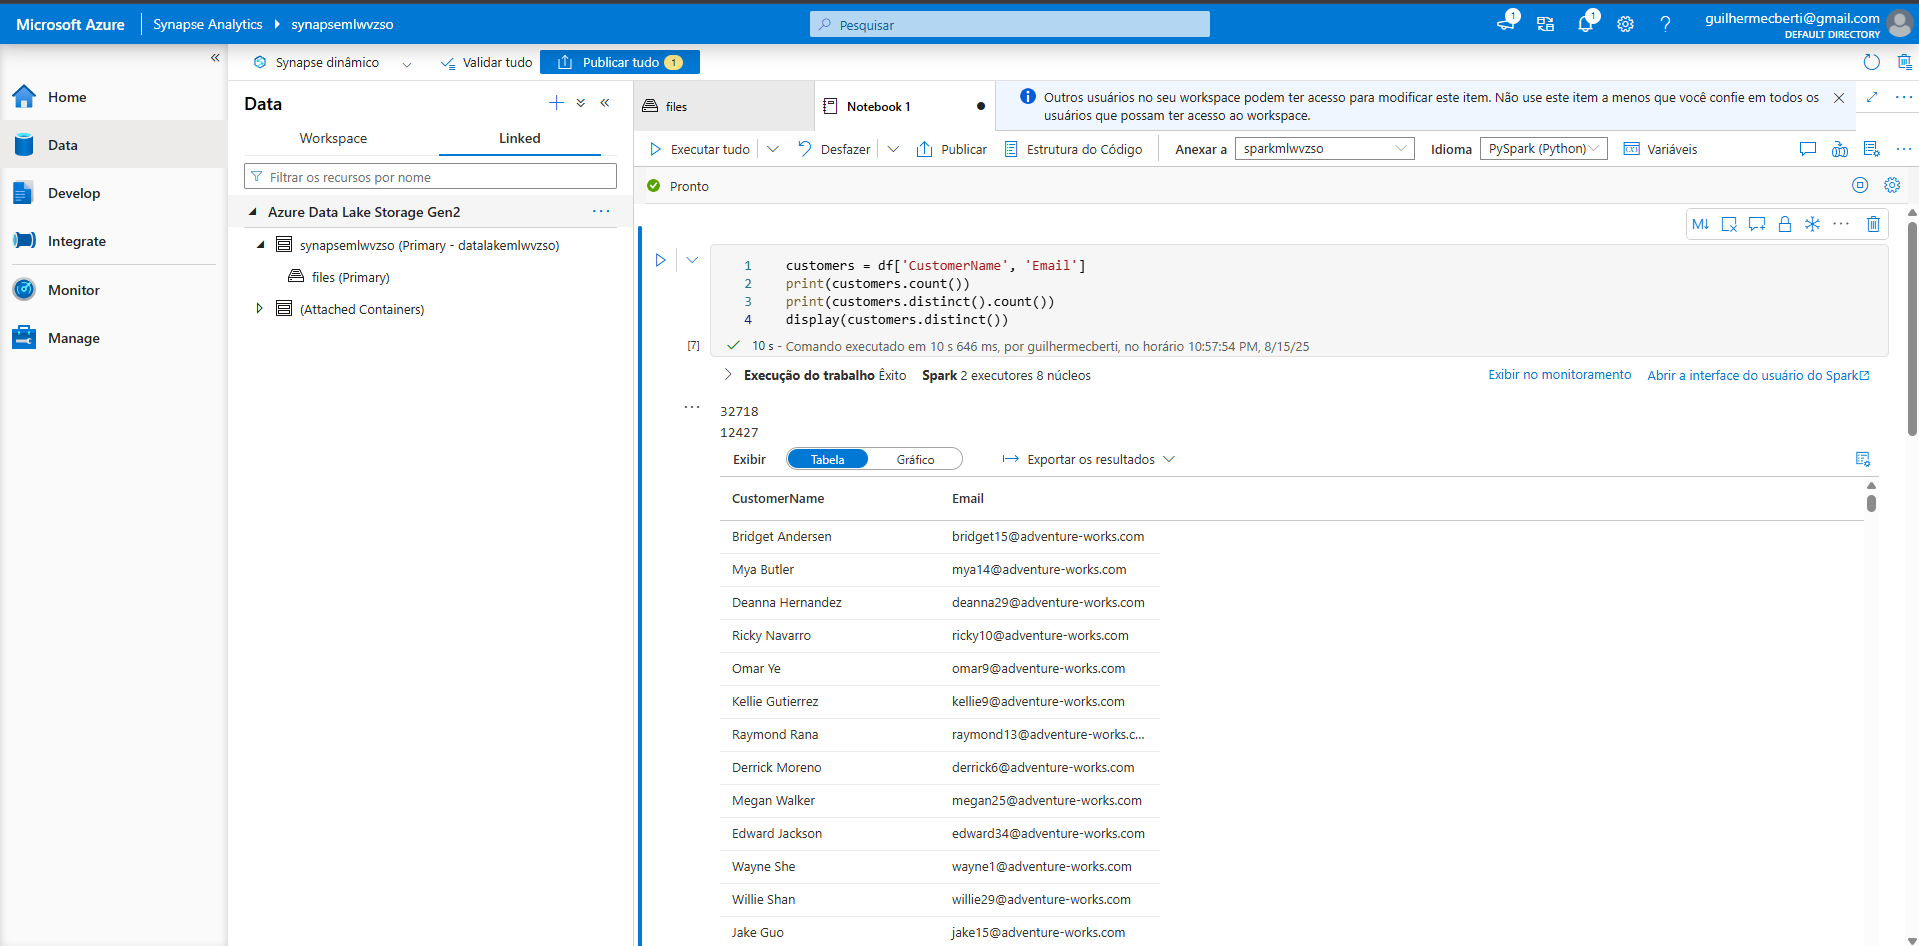

Execute a nova célula de código e revise os resultados. Observe os seguintes detalhes:

uando você executa uma operação em um dataframe, o resultado é um novo dataframe

Os dataframes fornecem funções como count e distinct que podem ser usadas para resumir e filtrar os dados que eles contêm.

A sintaxe dataframe['Campo1', 'Campo2', ...] é uma forma abreviada de definir um subconjunto de colunas. Você também pode usar o método select, então a primeira linha do código acima poderia ser escrita como

customers = df.select("NomeDoCliente", "E-mail")

## Agregar e agrupar dados em um dataframe

Adicione uma nova célula de código ao notebook e insira o seguinte código nela:

In [ ]:
 productSales = df.select("Item", "Quantity").groupBy("Item").sum()
 display(productSales)

Na célula de código que você adicionou, observe que os resultados mostram a soma das quantidades do pedido agrupadas por produto. O método groupBy agrupa as linhas por Item, e a função de agregação de soma subsequente é aplicada a todas as colunas numéricas restantes (neste caso, Quantidade).

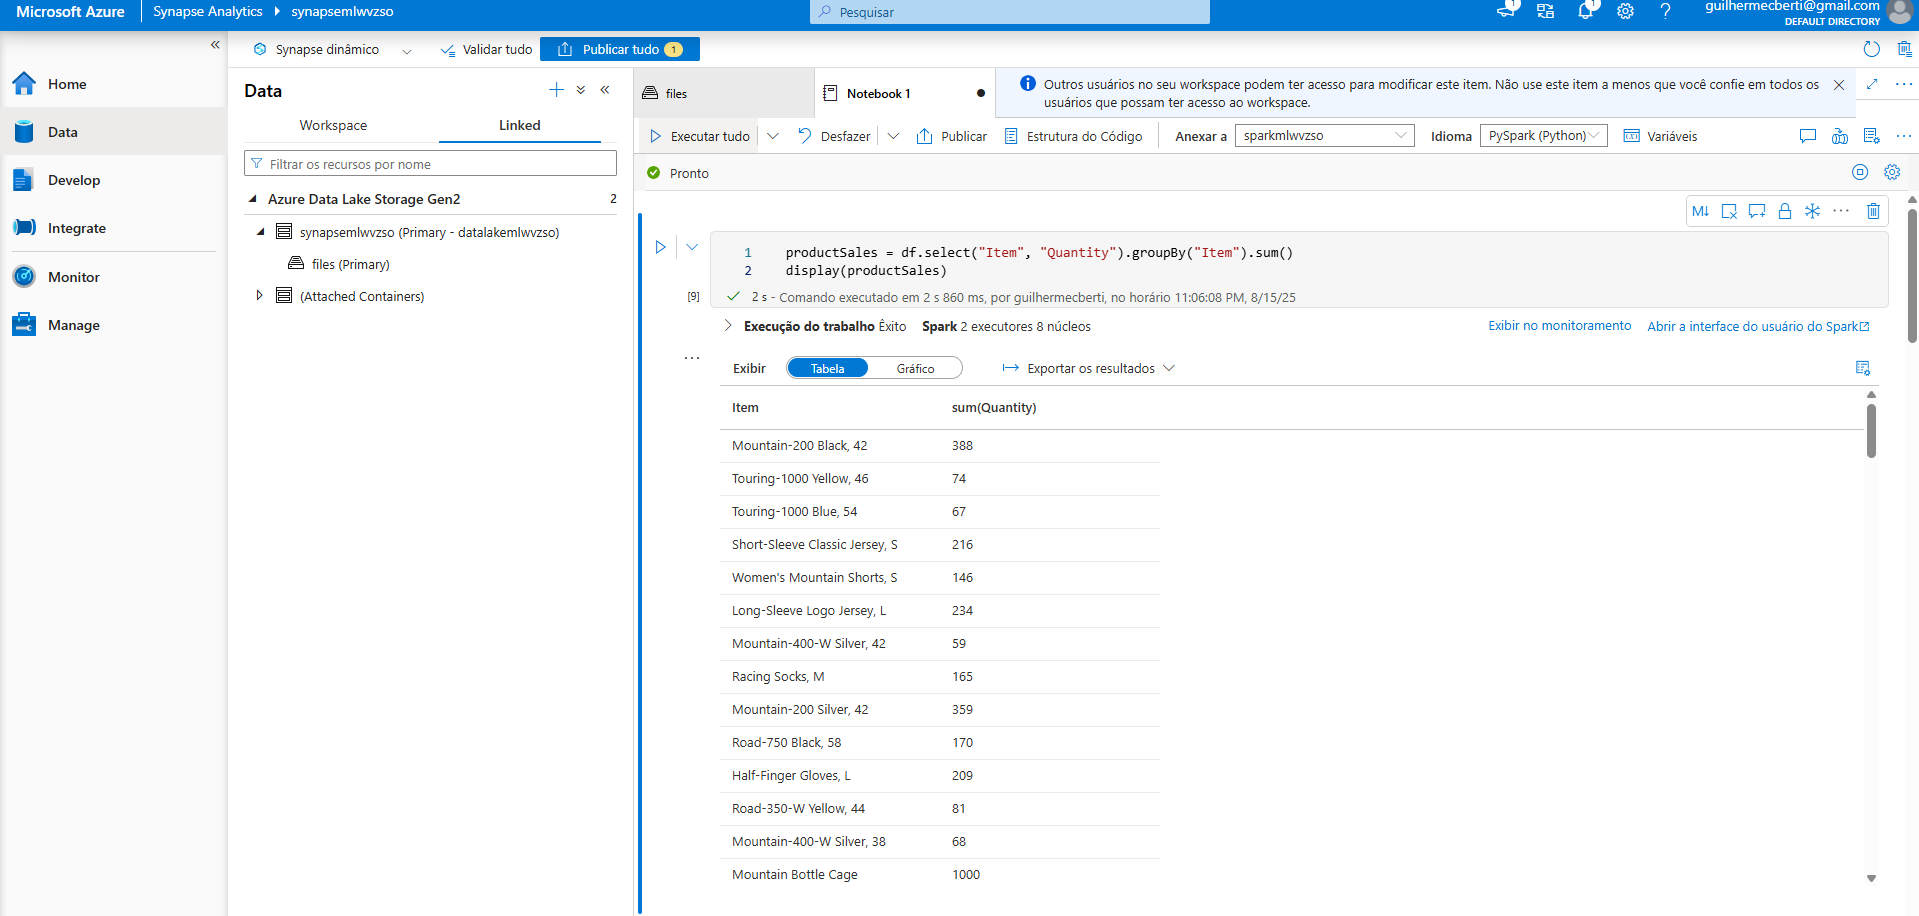

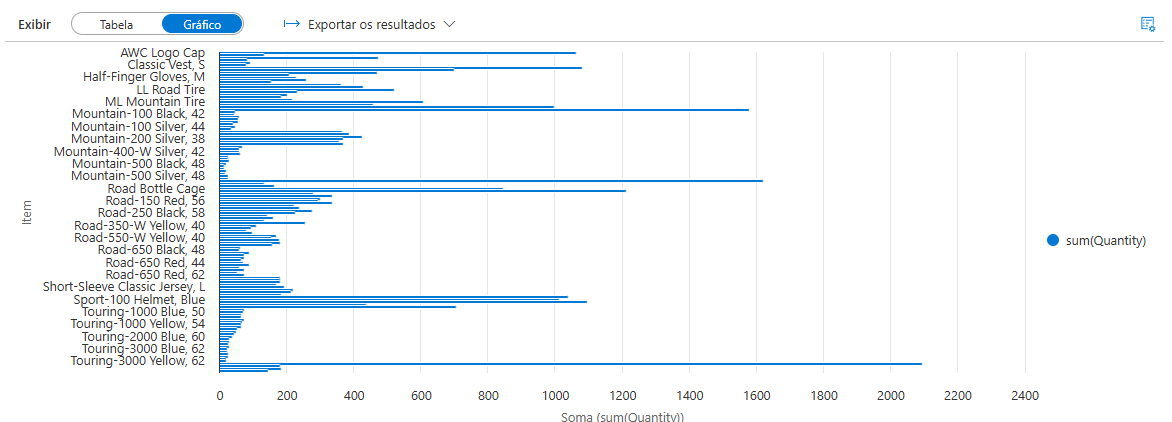

## Consultar dados usando Spark SQL

A linguagem padrão nos notebooks do Azure Synapse Studio é o PySpark, um runtime Python baseado em Spark. Nesse runtime, você pode usar a biblioteca spark.sql para incorporar a sintaxe Spark SQL ao seu código Python e trabalhar com construções SQL, como tabelas e exibições.

In [ ]:
 df.createOrReplaceTempView("salesorders")

 spark_df = spark.sql("SELECT * FROM salesorders")
 display(spark_df)

O método spark.sql é então usado para executar uma consulta SQL na exibição salesorders.

Os resultados da consulta são armazenados em um dataframe.

Embora seja útil poder incorporar instruções SQL em uma célula que contém código PySpark, os analistas de dados geralmente querem trabalhar diretamente em SQL.

In [ ]:
 %%sql
 SELECT YEAR(OrderDate) AS OrderYear,
        SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
 FROM salesorders
 GROUP BY YEAR(OrderDate)
 ORDER BY OrderYear;

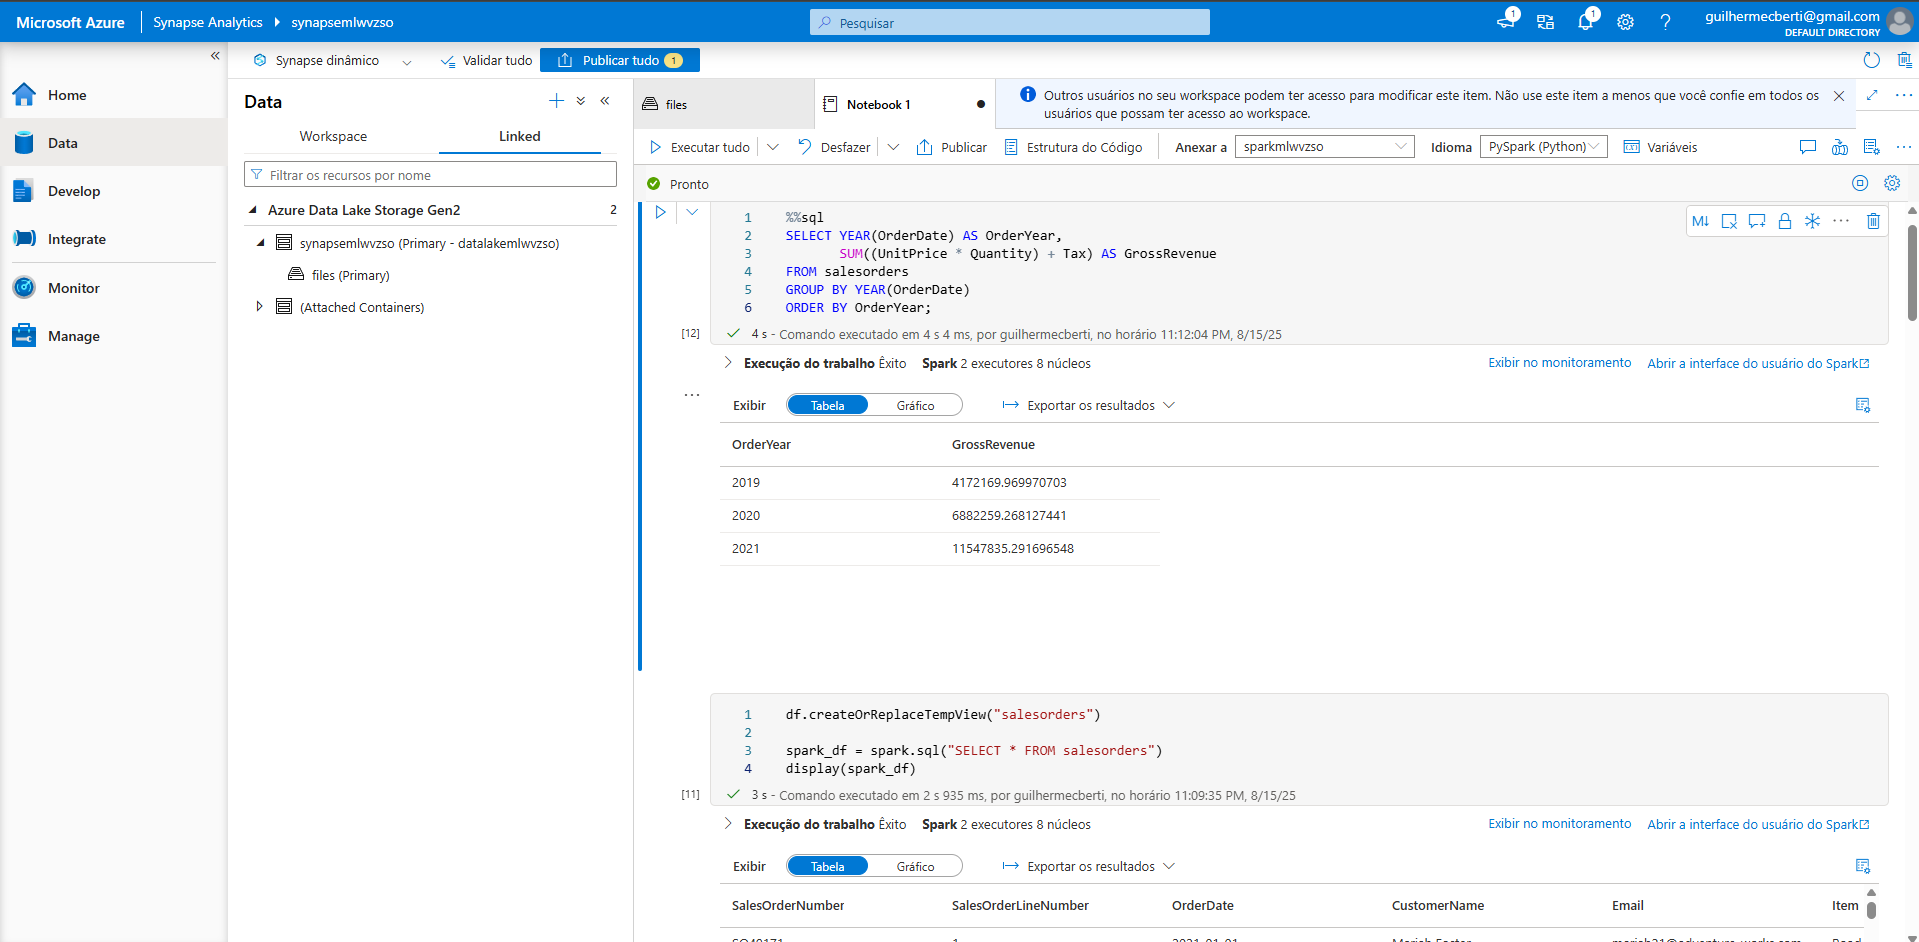